## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [5]:
# Since there are more timestamps than user_ids there are duplicate user_ids. The following is to understand these duplicates
dup_bools = df['user_id'].duplicated()
dup_bools.value_counts()

False    290584
True       3894
Name: user_id, dtype: int64

In [6]:
# So there are 3894 duplicate user_ids. We need to understand these duplicates before assessing the users converted.
# Get list of duplicate user_ids
df_dup_uids = df[dup_bools]
dup_uids = df_dup_uids['user_id']
# Are there any cases where more than one of the duplicated user_id rows have converted==1?
# Narrow df with the duplicated UIDs to just the ones with converted field == 1
df_dup_uids_conv1 = df_dup_uids.loc[df['converted']==1]
# Now find the duplicated UTDs in this df
prob_bools = df_dup_uids_conv1['user_id'].duplicated()
prob_bools.value_counts()

False    492
Name: user_id, dtype: int64

In [7]:
# There are no cases where the same UID gets converted more than once.

d. The proportion of users converted.

In [8]:
# Since the above determined that duplicate UIDs will not affect the conversion proportion we can simply count the number 
#     of conversions and divide that by the number of unique UIDs
df['converted'].sum()/df['user_id'].nunique()

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
# Get the indices for the two misalignment scenarios and sum there sizes
unaligned1_idx = df.loc[df['landing_page']=='new_page'].index.intersection(df.loc[df['group']=='control'].index)
unaligned2_idx = df.loc[df['landing_page']=='old_page'].index.intersection(df.loc[df['group']=='treatment'].index)
unaligned1_idx.size + unaligned2_idx.size

3893

f. Do any of the rows have missing values?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
# Drop the unaligned indices found above
df.info()
df1=df.drop(unaligned1_idx)
df2=df1.drop(unaligned2_idx)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


c. What is the row information for the repeat **user_id**? 

In [15]:
dup_bools = df2['user_id'].duplicated()
df2[dup_bools]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2.drop(index=2893,inplace=True)

In [17]:
# Check that the duplicate user_id was indeed dropped (there should only be one True)
df2['user_id'].isin(['773192']).value_counts()

False    290583
True          1
Name: user_id, dtype: int64

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
# This is calculated the same as in Quiz 1: simply count the number 
#     of converts and divide that by the number of unique UIDs
df2['converted'].sum()/df2['user_id'].nunique()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
# Filter on group == control and then repeat the above calculation
df2_ctrl = df2.loc[df2['group']=='control']
p_old_obs = df2_ctrl['converted'].sum()/df2_ctrl['user_id'].nunique()
p_old_obs

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
# Filter on group == treatment and then repeat the above calculation
df2_treat = df2.loc[df2['group']=='treatment']
p_new_obs = df2_treat['converted'].sum()/df2_treat['user_id'].nunique()
p_new_obs

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
# Filter on landing_page == 'new_page' and divide the number of unique user_ids
df2_new = df2.loc[df2['landing_page']=='new_page']
df2_new['user_id'].nunique()/df2['user_id'].nunique()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Based on this convert rates calculated from this data there is **not** sufficient evidence to say that the new treatment page leads to more conversions. The probability of converting for the treatment group (those receiving the new page) is actually slightly _lower_ than the probability of converting for the control group (those receiving the old page).

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null hypothesis**: The converted rate for the old landing page is better than or the same as that of the new landing page or **$p_{new}$ - $p_{old}$ $\le$ 0** 

**Alternative hypothesis**: The converted rate for the new landing page is better than that of the old landing page  or **$p_{new}$ - $p_{old}$ > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
# Based on the assumption stated in 2 above, pnew is assumed to be equal to the converted rate in ab_data.csv regardless of page
# This is calculated the same as in Quiz 1: simply count the number 
#     of converts and divide that by the number of unique UIDs
p_new = df2['converted'].sum()/df2['user_id'].nunique()

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
# Based on the assumption stated in 2 above, pnew and pold are equal
p_old = p_new
print(p_old)

0.11959708724499628


c. What is $n_{new}$?

In [24]:
# n_new is the number of unique users that received the new landing page
n_new = df2_new['user_id'].size
print(n_new)

145310


d. What is $n_{old}$?

In [25]:
# n_old is the number of unique users that received the old landing page
# Filter on landing_page == 'old_page' and divide the number of unique user_ids
df2_old = df2.loc[df2['landing_page']=='old_page']
n_old = df2_old['user_id'].size
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
# Form an array of size n_new containing ones and zeros with ones in the proportion to p_new
n_new_ones = int(round(n_new*p_new))
new_page_converted = np.zeros(n_new)
new_page_converted[:n_new_ones] = np.ones(n_new_ones)
p_new_sim = new_page_converted.mean()
print('length of array=',new_page_converted.size, 'p_new=', p_new, ', p_new_sim=', p_new_sim)

length of array= 145310 p_new= 0.11959708724499628 , p_new_sim= 0.11959947698024913


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
# Form an array of size n_old containing ones and zeros with ones in the proportion to p_old
n_old_ones = int(round(n_old*p_old))
old_page_converted = np.zeros(n_old)
old_page_converted[:n_old_ones] = np.ones(n_old_ones)
p_old_sim = old_page_converted.mean()
print('length of array=',old_page_converted.size,'p_old=', p_old, 'p_old_sim=', p_old_sim)

length of array= 145274 p_old= 0.11959708724499628 p_old_sim= 0.11959469691754891


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
p_new_sim-p_old_sim

4.780062700215915e-06

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
# Simulate using bootstrap sampling
p_diffs = np.zeros(10000)
for i in range(10000):
    b_sample_new = np.random.choice(new_page_converted,size=n_new, replace=True)
    b_sample_old = np.random.choice(old_page_converted,size=n_old, replace=True)
    p_diffs[i] = b_sample_new.mean()-b_sample_old.mean()


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   7.,   50.,  312., 1253., 2443., 3004., 1999.,  755.,  153.,
          24.]),
 array([-0.00495077, -0.00401677, -0.00308278, -0.00214878, -0.00121479,
        -0.00028079,  0.00065321,  0.0015872 ,  0.0025212 ,  0.00345519,
         0.00438919]),
 <a list of 10 Patch objects>)

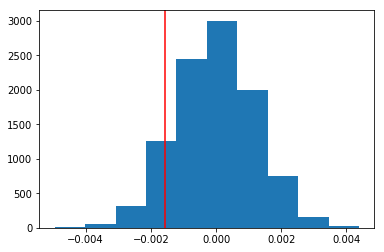

In [30]:
p_diff_obs = p_new_obs-p_old_obs
plt.axvline(p_diff_obs, color='r')
p_diff_hist=plt.hist(p_diffs)
p_diff_hist

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
(np.array(p_diffs) > p_diff_obs).mean()

0.9011

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The above histogram plots the sampling distribution along with the observed difference between the control and treatment conversion rates in the dataset. The portion of the sampling distribution greater than the observed conversion rate difference between the treatment and control groups in the original dataset is 91.0%. This is proportion is referred to as the p-value. A p-value of 0.9101 is definitely way too large to reject the null hypothesis. A value of 0.05 is the threshold that we set a priori for rejecting the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2[df2['group'] == 'control'].converted.sum()
convert_new = df2[df2['group'] == 'treatment'].converted.sum()
#n_old = 
#n_new = 
print('convert_old=',convert_old, 'convert_new=',convert_new,'n_old=',n_old,'n_new=',n_new)

convert_old= 17489 convert_new= 17264 n_old= 145274 n_new= 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
#print(z_score, p-val)

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The built-in function returns values similar to those computed in parts **j.** and **k.** above. The _p-val_ returned from `stats.proportions_ztest`is the p-value as we computed above and it agrees fairly closely with our previous result. The _z-score_ says that the observed p_diff value from the dataset is 1.31 standard deviations _below_ mean of the sampling distribution formed under the null hypothesis and since we need p_diffs to be _greater than_ the null hypothesis distribution to reject the null, this confirms our conclusion that the dataset does _not_ support rejecting the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

The the response variable is categorical we need to use a logistic regression model.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
# get dummies and intercept
df2['intercept']=1
temp = pd.get_dummies(df2['landing_page'])
df2['ab_page']=temp['new_page']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
logm = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 04 Jun 2019   Pseudo R-squ.:               8.077e-06
Time:                        17:47:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The null hypothesis in **Part II** was that the converted rate for the new landing page is less than or equal to the converted rate for the old landing page. Note that this is a *one-tailed test*. In contrast the null hypothesis for the regression model constructed in **Part III** is that the landing page predictor variable (**ab_page**) is not related to the **converted** response variable. This implies that the null hypothesis can be rejected if the landing page has *either a positive or negative affect* on the converted rate so this becomes a *two-tailed test*. Since the test statistic (**p_diff_obs**) fell to the left of the sample distribution under the null hypothesis, the p-value would be calculated as the area under the curve *to the left* instead of to the right as we did in **Part II**.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Deliberation on one's model is typically a good thing to do to guard against relevant factors being missed. For example, time of day (ToD) or day of week (DoW) might have an influence on the conversion rate of one landing page or the other. If so the correct decision might be a ToD or DoW landing page. An inaccurate model can lead to poor decision making. On the other hand, adding terms to our regression model can lead to unnecessary complication and difficulty interpreting the results.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [38]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [39]:
logm2 = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA','UK']])
results = logm2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 04 Jun 2019   Pseudo R-squ.:               2.323e-05
Time:                        17:47:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

Based on the above logistic regression model results the conversion rate for Canadian users was 4% less likely to convert than a user in the US holding landing page constant. A user in the UK is 1% *more* likely to convert than a user in the US holding landing page constant. The p-values associated with the CA and UK predictor variables are 0.130 and 0.457, respectively, which both fall below our pre-determined threshold for statistical significance. Therefore it seems appropriate to conclude that the addition of country does not significantly affect our prior conclusions.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
# Adding a higher order, interaction terms to the model
df_new['CA_pg']=df_new['CA']*df_new['ab_page']
df_new['UK_pg']=df_new['UK']*df_new['ab_page']
df_new['US_pg']=df_new['US']*df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,CA_pg,UK_pg,US_pg
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [41]:
# fit a model that includes the higher order terms
logm3 = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA','UK','CA_pg','UK_pg']])
results = logm3.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 04 Jun 2019   Pseudo R-squ.:               3.482e-05
Time:                        17:47:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_pg         -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_pg          0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

The Logistic Regression model with interaction terms does have a slightly better "pseudo R-square" value but it is still extremely small. Interpreting the coefficients given the interaction terms is more difficult so that is a disadvantage of this model compared to the previous one and none of the terms has a p-value less then 0.05 so we still don't have statistical significance. Therefore, the recommendation from **Part III** of this analysis is the same as that from **Part II** - the dataset does _not_ support rejecting the null hypothesis. The e-commerce company should continue using the old landing page.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.